In [29]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
df=pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,41.5,20.0,186,3450,NaN
4,Adelie,Torgersen,36.7,19.3,193,3450,female


In [31]:
df=df.dropna()

In [32]:
df=pd.get_dummies(df,columns=['Gender'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender_female,Gender_male
0,Adelie,Torgersen,39.1,18.7,181,3750,False,True
1,Adelie,Torgersen,39.5,17.4,186,3800,True,False
2,Adelie,Torgersen,40.3,18.0,195,3250,True,False
4,Adelie,Torgersen,36.7,19.3,193,3450,True,False
5,Adelie,Torgersen,39.3,20.6,190,3650,False,True


In [33]:
df=df.drop(columns=['Gender_male','species','island'],axis=1)

In [34]:
x=df.drop('Gender_female',axis=1)
y=df['Gender_female']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
df.tail()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender_female
339,55.8,19.8,207,4000,False
340,43.5,18.1,202,3400,True
341,49.6,18.2,193,3775,False
342,50.8,19.0,210,4100,False
343,50.2,18.7,198,3775,True


In [36]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

D:\Anaconda_Navigator\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
pred=model.predict(xtest)

In [38]:
print(model.coef_)

[[-0.04979291 -1.94808857  0.03574218 -0.00517123]]


In [39]:
clf=confusion_matrix(ytest,pred)
print(clf)

[[27  2]
 [ 4 34]]


In [40]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90        29
        True       0.94      0.89      0.92        38

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



<Axes: >

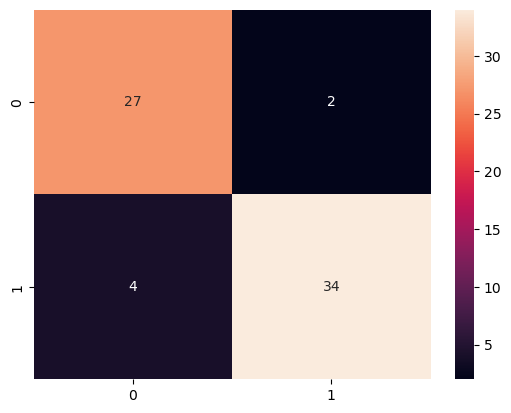

In [41]:
sns.heatmap(clf,annot=True)

<Axes: >

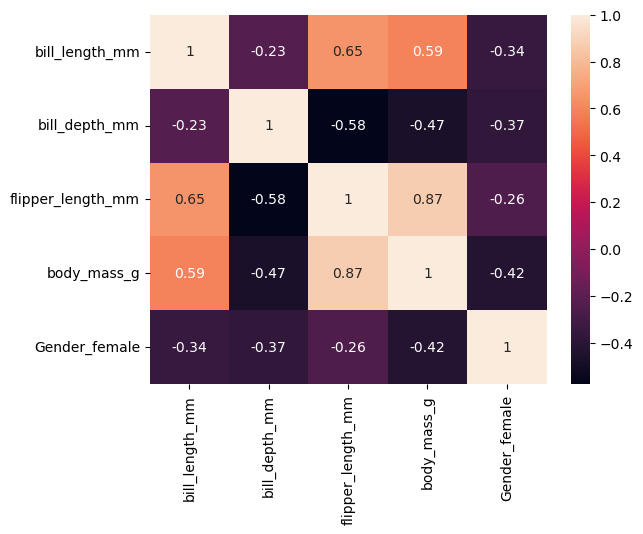

In [42]:
sns.heatmap(df.corr(),annot=True)

In [46]:
print("Accuracy:",accuracy_score(ytest, pred))
print("Precision:",precision_score(ytest, pred))
print("Recall:",recall_score(ytest, pred))

Accuracy: 0.9104477611940298
Precision: 0.9444444444444444
Recall: 0.8947368421052632
